<a href="https://colab.research.google.com/github/Soikey/Drug-Discovery/blob/main/SARS_Coronavirus_Descriptor_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [5]:
# !conda remove --name rdkit-env --all -y

# !wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O Miniconda3-latest-Linux-x86_64.sh
# !chmod +x Miniconda3-latest-Linux-x86_64.sh
# !bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

# !conda init bash
# !source ~/.bashrc

# !conda create -y -n rdkit-env python=3.7
# !source activate rdkit-env

# !conda install -y -c conda-forge rdkit


# import sys
# sys.path.append('/usr/local/lib/python3.7/site-packages/')


EnvironmentLocationNotFound: Not a conda environment: /usr/local/envs/rdkit-env

--2025-02-16 17:52:53--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154615621 (147M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 147.45M   272MB/s    in 0.5s    

2025-02-16 17:52:54 (272 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [154615621/154615621]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python

In [1]:

!pip install rdkit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 17.9 MB/s eta 0:00:00


## **Load bioactivity data**

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/sars_corona_bioactivity_data_curated.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [4]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [5]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [6]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [7]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,638.717,6.73710,0.0,10.0
1,640.733,6.72260,1.0,10.0
2,638.761,7.09400,0.0,9.0
3,602.585,2.31218,4.0,13.0
4,4429.339,-10.14886,61.0,56.0
5,4373.049,-10.39730,59.0,60.0
6,4331.996,-9.97540,59.0,60.0


In [8]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4757277,COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3c(cc4c(c3Oc3cc5...,720.0,active
1,CHEMBL4751417,COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3cc(c(OC)cc3CCN1...,910.0,active
2,CHEMBL4745800,COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3cc(c(OC)cc3CCN1...,290.0,active
3,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,700.0,active
4,CHEMBL5078598,CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](CCC(=O)O)...,20000.0,inactive
5,CHEMBL5086479,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,280.0,active
6,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,1810.0,intermediate


Now, let's combine the 2 DataFrame

In [21]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [22]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4757277,COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3c(cc4c(c3Oc3cc5...,720.0,active,638.717,6.73710,0.0,10.0
1,CHEMBL4751417,COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3cc(c(OC)cc3CCN1...,910.0,active,640.733,6.72260,1.0,10.0
2,CHEMBL4745800,COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3cc(c(OC)cc3CCN1...,290.0,active,638.761,7.09400,0.0,9.0
3,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,700.0,active,602.585,2.31218,4.0,13.0
4,CHEMBL5078598,CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](CCC(=O)O)...,20000.0,inactive,4429.339,-10.14886,61.0,56.0
5,CHEMBL5086479,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,280.0,active,4373.049,-10.39730,59.0,60.0
6,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,1810.0,intermediate,4331.996,-9.97540,59.0,60.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [33]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [24]:
df_combined.standard_value.describe()

,standard_value
count,7.000000
mean,3530.000000
std,7280.668467
min,280.000000
25%,495.000000
50%,720.000000
75%,1360.000000
max,20000.000000


In [13]:
-np.log10( (10**-9)* 100000000 )

1.0

In [14]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [29]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value',axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [30]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL4757277,COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3c(cc4c(c3Oc3cc5...,active,638.717,6.73710,0.0,10.0,720.0
1,CHEMBL4751417,COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3cc(c(OC)cc3CCN1...,active,640.733,6.72260,1.0,10.0,910.0
2,CHEMBL4745800,COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3cc(c(OC)cc3CCN1...,active,638.761,7.09400,0.0,9.0,290.0
3,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,active,602.585,2.31218,4.0,13.0,700.0
4,CHEMBL5078598,CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](CCC(=O)O)...,inactive,4429.339,-10.14886,61.0,56.0,20000.0
5,CHEMBL5086479,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,active,4373.049,-10.39730,59.0,60.0,280.0
6,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,intermediate,4331.996,-9.97540,59.0,60.0,1810.0


In [31]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,7.000000
mean,3530.000000
std,7280.668467
min,280.000000
25%,495.000000
50%,720.000000
75%,1360.000000
max,20000.000000


In [34]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4757277,COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3c(cc4c(c3Oc3cc5...,active,638.717,6.73710,0.0,10.0,6.142668
1,CHEMBL4751417,COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3cc(c(OC)cc3CCN1...,active,640.733,6.72260,1.0,10.0,6.040959
2,CHEMBL4745800,COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3cc(c(OC)cc3CCN1...,active,638.761,7.09400,0.0,9.0,6.537602
3,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,active,602.585,2.31218,4.0,13.0,6.154902
4,CHEMBL5078598,CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](CCC(=O)O)...,inactive,4429.339,-10.14886,61.0,56.0,4.698970
5,CHEMBL5086479,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,active,4373.049,-10.39730,59.0,60.0,6.552842
6,CHEMBL5283406,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,intermediate,4331.996,-9.97540,59.0,60.0,5.742321


In [35]:
df_final.pIC50.describe()

,pIC50
count,7.000000
mean,5.981466
std,0.632106
min,4.698970
25%,5.891640
50%,6.142668
75%,6.346252
max,6.552842


### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [38]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4757277,COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3c(cc4c(c3Oc3cc5...,active,638.717,6.73710,0.0,10.0,6.142668
1,CHEMBL4751417,COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3cc(c(OC)cc3CCN1...,active,640.733,6.72260,1.0,10.0,6.040959
2,CHEMBL4745800,COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3cc(c(OC)cc3CCN1...,active,638.761,7.09400,0.0,9.0,6.537602
3,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,active,602.585,2.31218,4.0,13.0,6.154902
4,CHEMBL5078598,CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](CCC(=O)O)...,inactive,4429.339,-10.14886,61.0,56.0,4.698970
5,CHEMBL5086479,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...,active,4373.049,-10.39730,59.0,60.0,6.552842


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [39]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

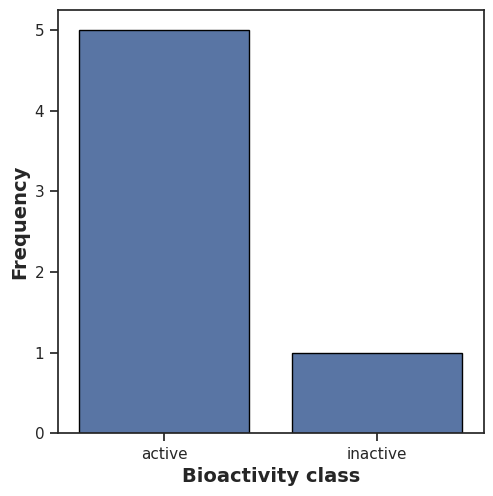

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

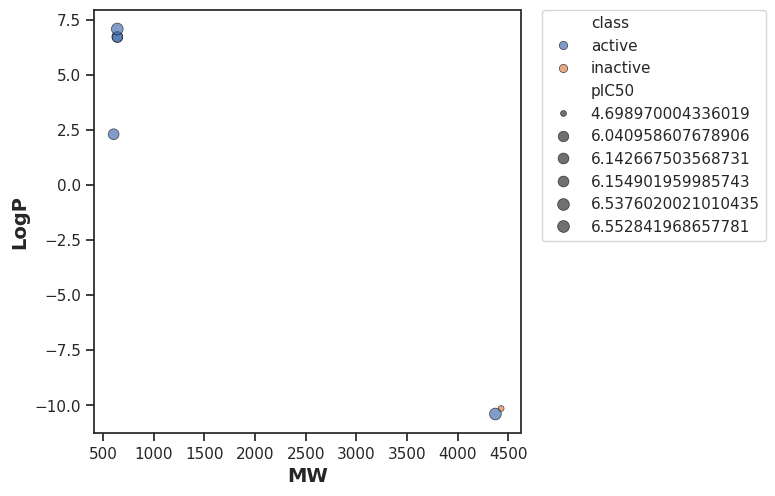

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

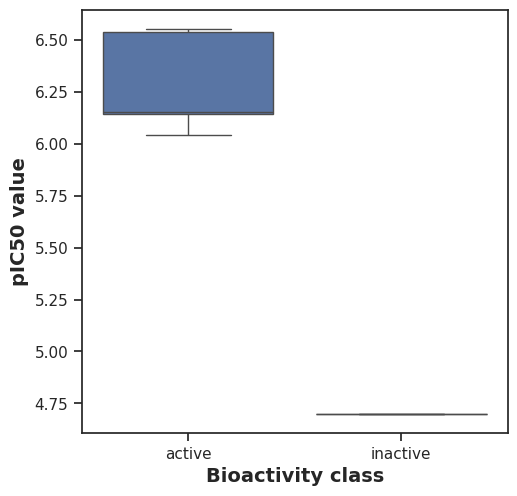

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.662636e-10,0.05,Different distribution (reject H0)


#### **MW**

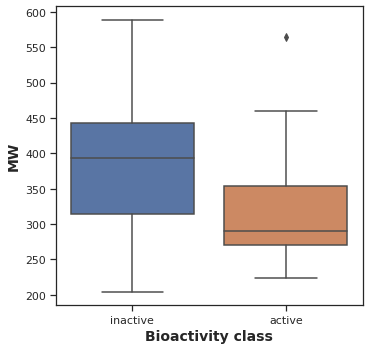

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,409.5,0.001525,0.05,Different distribution (reject H0)


#### **LogP**

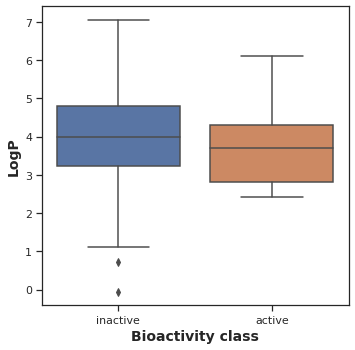

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,712.5,0.295805,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

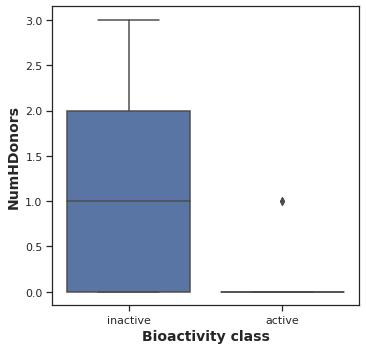

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,299.5,0.000024,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

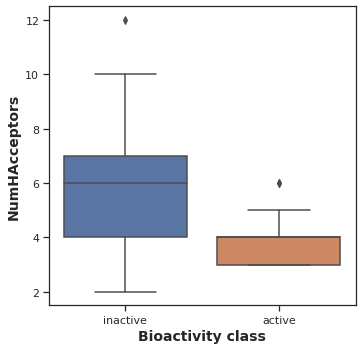

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,415.0,0.001557,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 12%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: plot_MW_vs_LogP.pdf (deflated 15%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: bioactivity_data_preprocessed.csv (deflated 80%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
